In [2]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics  import confusion_matrix, accuracy_score
import pickle

In [3]:
# Loading MNIST dataset
mnist_train = torchvision.datasets.MNIST("./data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
mnist_test = torchvision.datasets.MNIST("./data",train=False,transform=torchvision.transforms.ToTensor(),download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
# Creating DataLoaders
dl_train = torch.utils.data.DataLoader(mnist_train,batch_size=128)
dl_test = torch.utils.data.DataLoader(mnist_test,batch_size=128)

In [5]:
# Defining the model
model = nn.Sequential(
    nn.Linear(784,300),
    nn.ReLU(inplace=True),
    nn.Linear(300,10)
)

In [ ]:
# Defining the Optimizer and Loss function
optim = torch.optim.Adam(model.parameters(),lr=0.01)
crit = nn.CrossEntropyLoss()

In [ ]:
# Training the model
# Using CPU
# EPOCHS = 50
# for epoch in range(EPOCHS):
#   acc_loss = 0
#   for x,y in dl_train:
#     optim.zero_grad()
#     x = x.view((-1,784))
#     o = model(x)
#     l = crit(o,y)
#     acc_loss += l 
#     l.backward()
#     optim.step()
#   print(acc_loss)


# Using GPU
dev = torch.device("cuda:0")
model = model.to(dev)
optim = torch.optim.Adam(model.parameters(),lr=0.01)

EPOCHS = 50
for epoch in range(EPOCHS):
  acc_loss = 0
  for x,y in dl_train:
    optim.zero_grad()
    x = x.view((-1,784)).to(dev)
    y = y.to(dev)
    o = model(x)
    l = crit(o,y)
    acc_loss += l 
    l.backward()
    optim.step()
  print(acc_loss)

tensor(112.1278, device='cuda:0', grad_fn=<AddBackward0>)
tensor(54.7191, device='cuda:0', grad_fn=<AddBackward0>)
tensor(42.2588, device='cuda:0', grad_fn=<AddBackward0>)
tensor(41.0931, device='cuda:0', grad_fn=<AddBackward0>)
tensor(34.5786, device='cuda:0', grad_fn=<AddBackward0>)
tensor(31.2220, device='cuda:0', grad_fn=<AddBackward0>)
tensor(31.3514, device='cuda:0', grad_fn=<AddBackward0>)
tensor(25.3178, device='cuda:0', grad_fn=<AddBackward0>)
tensor(24.9093, device='cuda:0', grad_fn=<AddBackward0>)
tensor(24.9958, device='cuda:0', grad_fn=<AddBackward0>)
tensor(24.5393, device='cuda:0', grad_fn=<AddBackward0>)
tensor(25.8176, device='cuda:0', grad_fn=<AddBackward0>)
tensor(23.3686, device='cuda:0', grad_fn=<AddBackward0>)
tensor(25.3676, device='cuda:0', grad_fn=<AddBackward0>)
tensor(18.9281, device='cuda:0', grad_fn=<AddBackward0>)
tensor(18.5069, device='cuda:0', grad_fn=<AddBackward0>)
tensor(17.9422, device='cuda:0', grad_fn=<AddBackward0>)
tensor(20.6851, device='cuda:0

In [ ]:
# Testing the model

# Using CPU

# o = torch.Tensor([])
# ground = torch.Tensor([])
# for x,y in dl_test:
#   tmp_x = x.view((-1,784))
#   tmp_o = torch.argmax(model(tmp_x),axis=1)
#   o = torch.cat((o,tmp_o))
#   ground = torch.cat((ground,y))

# Using GPU

o = torch.Tensor([])
ground = torch.Tensor([])
for x,y in dl_test:
  tmp_x = x.view((-1,784)).to(dev)
  tmp_o = torch.argmax(model(tmp_x),axis=1).cpu()
  o = torch.cat((o,tmp_o))
  ground = torch.cat((ground,y))

In [ ]:
# Confusion matrix and Accuracy Score of the trained model
print(confusion_matrix(ground,o))
print(accuracy_score(ground,o))

[[ 972    1    1    0    0    2    3    1    0    0]
 [   2 1123    1    1    0    1    0    1    6    0]
 [   3    2 1003    2    7    0    2   10    3    0]
 [   0    0    6  976    0   16    0    5    4    3]
 [   1    0    1    0  967    0    5    1    1    6]
 [   2    0    0    5    2  874    4    1    2    2]
 [   2    2    1    0    6   12  933    0    2    0]
 [   1    2    8    2    3    1    0 1003    2    6]
 [   7    0    6    4    6    4    4    4  936    3]
 [   2    2    0    4   34    3    0   13    1  950]]
0.9737


In [ ]:
# Saving the model
torch.save(model,"mnist_mlp")

In [7]:
# Defining a module that reshapes a Tensor
class Reshape(nn.Module):
  def __init__(self,new_shape):
    super().__init__()
    self.new_shape = new_shape
  def forward(self,x):
    return x.view(self.new_shape)

In [ ]:
# Defining the Convolutional Network
model = nn.Sequential(
    nn.Conv2d(1,8,4,stride=2),
    nn.BatchNorm2d(8),
    nn.ReLU(inplace=True),
    nn.Conv2d(8,16,3,stride=2),
    nn.BatchNorm2d(16),
    nn.ReLU(inplace=True),
    Reshape((-1,576)),
    nn.Linear(576,32),
    nn.ReLU(inplace=True),
    nn.Linear(32,10)
)

In [ ]:
# Defining the Optimizer and Loss Function
optim = torch.optim.Adam(model.parameters(),lr=0.01)
crit = nn.CrossEntropyLoss()

In [ ]:
# Training the model

# Using CPU
# EPOCHS = 20
# for epoch in range(EPOCHS):
#   acc_loss = 0
#   for x,y in dl_train:
#     optim.zero_grad()
#     o = model(x)
#     l = crit(o,y)
#     acc_loss += l 
#     l.backward()
#     optim.step()
#   print(acc_loss)

# Using GPU
dev = torch.device("cuda:0")
model = model.to(dev)
optim = torch.optim.Adam(model.parameters(),lr=0.01)

EPOCHS = 20
for epoch in range(EPOCHS):
  acc_loss = 0
  for x,y in dl_train:
    optim.zero_grad()
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    l = crit(o,y)
    acc_loss += l 
    l.backward()
    optim.step()
  print(acc_loss)

tensor(79.9876, device='cuda:0', grad_fn=<AddBackward0>)
tensor(33.4169, device='cuda:0', grad_fn=<AddBackward0>)
tensor(24.8853, device='cuda:0', grad_fn=<AddBackward0>)
tensor(21.1444, device='cuda:0', grad_fn=<AddBackward0>)
tensor(18.5683, device='cuda:0', grad_fn=<AddBackward0>)
tensor(17.4677, device='cuda:0', grad_fn=<AddBackward0>)
tensor(15.3092, device='cuda:0', grad_fn=<AddBackward0>)
tensor(14.0525, device='cuda:0', grad_fn=<AddBackward0>)
tensor(13.1859, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.4912, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.2298, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.0377, device='cuda:0', grad_fn=<AddBackward0>)
tensor(10.4454, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9.3766, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.1630, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.7666, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.8466, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9.1121, device='cuda:0', gra

In [ ]:
# Testing the model

# Using CPU 

# o = torch.Tensor([])
# ground = torch.Tensor([])
# for x,y in dl_test:
#   tmp_o = torch.argmax(model(x),axis=1)
#   o = torch.cat((o,tmp_o))
#   ground = torch.cat((ground,y))

# Using GPU

o = torch.Tensor([])
ground = torch.Tensor([])
for x,y in dl_test:
  tmp_o = torch.argmax(model(x.to(dev)),axis=1).cpu()
  o = torch.cat((o,tmp_o))
  ground = torch.cat((ground,y))

In [ ]:
# Confusion Matrix and Accuracy Score of the trained model
print(confusion_matrix(ground,o))
print(accuracy_score(ground,o))

[[ 978    0    0    0    0    0    0    0    2    0]
 [   1 1123    3    0    1    1    3    2    1    0]
 [   6    1 1018    1    1    0    0    2    3    0]
 [   1    0    6  989    0    5    0    5    2    2]
 [   0    1    0    0  965    0    5    0    0   11]
 [   4    0    0    5    0  873    3    1    0    6]
 [  10    3    1    0    3    5  932    0    4    0]
 [   1    3   12    0    2    0    0 1008    1    1]
 [   4    0    5    3    0    2    1    4  949    6]
 [   1    0    0    0    9    1    0    6    4  988]]
0.9823


In [ ]:
# Saving the model
torch.save(model,"mnist_cnn")

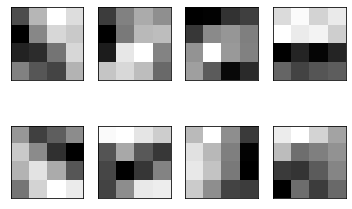

In [ ]:
# Ploting the first filters
param = next(iter(model.parameters())).cpu()
fig,axs = plt.subplots(nrows=2,ncols=4)
for idx in range(8):
  axs[idx//4,idx%4].imshow(param[idx][0].detach().numpy(),cmap="gray")
  axs[idx//4,idx%4].axes.xaxis.set_visible(False)
  axs[idx//4,idx%4].axes.yaxis.set_visible(False)

In [8]:
# Resnet Block
class BasicResBlock(nn.Module):
  def __init__(self,in_channels,out_channels,stride=1):
    super().__init__()
    self.straight = nn.Sequential(
        nn.Conv2d(in_channels,out_channels,3,stride=stride,padding=1,bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels,out_channels,3,padding=1,bias=False),
        nn.BatchNorm2d(out_channels)
    )
    
    if stride==1 and in_channels==out_channels:
      self.shortcut = nn.Sequential()
    else:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_channels,out_channels,1,stride=stride,bias=False),
          nn.BatchNorm2d(out_channels)
      )
    
    self.relu = nn.ReLU(inplace=True)
  
  def forward(self,x):
    o = self.straight(x)
    s = self.shortcut(x)
    return self.relu(o + s)

In [ ]:
# Defining the Residual Network
model = nn.Sequential(
    BasicResBlock(1,8,stride=2),
    BasicResBlock(8,16,stride=2),
    Reshape((-1,49*16)),
    nn.Linear(49*16,32),
    nn.ReLU(inplace=True),
    nn.Linear(32,10)
)

In [ ]:
# Defining the Optimizer and Loss Function
optim = torch.optim.Adam(model.parameters(),lr=0.01)
crit = nn.CrossEntropyLoss()

In [ ]:
# Training the model

# Using CPU
# EPOCHS = 20
# for epoch in range(EPOCHS):
#   acc_loss = 0
#   for x,y in dl_train:
#     optim.zero_grad()
#     o = model(x)
#     l = crit(o,y)
#     acc_loss += l 
#     l.backward()
#     optim.step()
#   print(acc_loss)

# Using GPU
dev = torch.device("cuda:0")
model = model.to(dev)
optim = torch.optim.Adam(model.parameters(),lr=0.01)

EPOCHS = 20
for epoch in range(EPOCHS):
  acc_loss = 0
  for x,y in dl_train:
    optim.zero_grad()
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    l = crit(o,y)
    acc_loss += l 
    l.backward()
    optim.step()
  print(acc_loss)

tensor(79.1671, device='cuda:0', grad_fn=<AddBackward0>)
tensor(29.6144, device='cuda:0', grad_fn=<AddBackward0>)
tensor(21.9178, device='cuda:0', grad_fn=<AddBackward0>)
tensor(18.2712, device='cuda:0', grad_fn=<AddBackward0>)
tensor(15.6548, device='cuda:0', grad_fn=<AddBackward0>)
tensor(13.9083, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12.7224, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12.1868, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.5496, device='cuda:0', grad_fn=<AddBackward0>)
tensor(10.2705, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11.3986, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9.9862, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9.4205, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9.8832, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9.0733, device='cuda:0', grad_fn=<AddBackward0>)
tensor(8.0530, device='cuda:0', grad_fn=<AddBackward0>)
tensor(7.9781, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9.0046, device='cuda:0', grad_

In [ ]:
# Testing the model

# Using CPU 

# o = torch.Tensor([])
# ground = torch.Tensor([])
# for x,y in dl_test:
#   tmp_o = torch.argmax(model(x),axis=1)
#   o = torch.cat((o,tmp_o))
#   ground = torch.cat((ground,y))

# Using GPU

o = torch.Tensor([])
ground = torch.Tensor([])
for x,y in dl_test:
  tmp_o = torch.argmax(model(x.to(dev)),axis=1).cpu()
  o = torch.cat((o,tmp_o))
  ground = torch.cat((ground,y))

In [ ]:
# Confusion Matrix and Accuracy Score of the trained model
print(confusion_matrix(ground,o))
print(accuracy_score(ground,o))

[[ 974    0    0    0    0    0    2    1    2    1]
 [   2 1128    1    0    0    0    0    4    0    0]
 [   2    0 1018    1    2    0    1    8    0    0]
 [   0    0    1 1002    0    5    0    1    1    0]
 [   0    1    0    0  971    0    1    0    1    8]
 [   0    0    0    6    0  880    3    0    2    1]
 [   3    1    0    1    2    1  947    0    3    0]
 [   0    2    1    1    1    0    0 1019    2    2]
 [   0    0    1    4    2    1    1    1  956    8]
 [   0    2    1    0   11    4    0    4    1  986]]
0.9881


In [ ]:
# Saving the model
torch.save(model,"mnist_resnet")

In [ ]:
# Check the model
model.eval()

Sequential(
  (0): BasicResBlock(
    (straight): Sequential(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (shortcut): Sequential(
      (0): Conv2d(1, 8, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (relu): ReLU(inplace=True)
  )
  (1): BasicResBlock(
    (straight): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1)

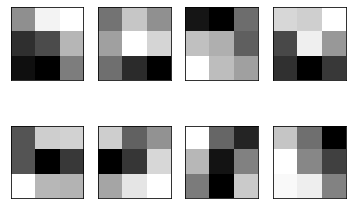

In [ ]:
# Ploting the first filters
param = next(iter(model.parameters())).cpu()
fig,axs = plt.subplots(nrows=2,ncols=4)
for idx in range(8):
  axs[idx//4,idx%4].imshow(param[idx][0].detach().numpy(),cmap="gray")
  axs[idx//4,idx%4].axes.xaxis.set_visible(False)
  axs[idx//4,idx%4].axes.yaxis.set_visible(False)

In [9]:
# Visualizing how parameters are uptaded

# Defining the MLP model
model_mlp = nn.Sequential(
    nn.Linear(784,300),
    nn.ReLU(inplace=True),
    nn.Linear(300,10)
)

# Defining the Convolutional Network
model_cnn = nn.Sequential(
    nn.Conv2d(1,8,4,stride=2),
    nn.BatchNorm2d(8),
    nn.ReLU(inplace=True),
    nn.Conv2d(8,16,3,stride=2),
    nn.BatchNorm2d(16),
    nn.ReLU(inplace=True),
    Reshape((-1,576)),
    nn.Linear(576,32),
    nn.ReLU(inplace=True),
    nn.Linear(32,10)
)

# Defining the Residual Network
model_res = nn.Sequential(
    BasicResBlock(1,8,stride=2),
    BasicResBlock(8,16,stride=2),
    Reshape((-1,49*16)),
    nn.Linear(49*16,32),
    nn.ReLU(inplace=True),
    nn.Linear(32,10)
)

In [10]:
def get_parameters(model):
  tmp = torch.tensor([])
  for param in model.parameters():
    tmp = torch.cat((tmp,param.cpu().view(-1)))
  return tmp.view((1,-1))

In [14]:
# Using GPU
dev = torch.device("cuda:0")
model_mlp = model_mlp.to(dev)
model_cnn = model_cnn.to(dev)
model_res = model_res.to(dev)

optim_mlp = torch.optim.Adam(model_mlp.parameters(),lr=0.01)
optim_cnn = torch.optim.Adam(model_cnn.parameters(),lr=0.01)
optim_res = torch.optim.Adam(model_res.parameters(),lr=0.01)

crit = nn.CrossEntropyLoss()

w_mlp = torch.tensor([])
w_cnn = torch.tensor([])
w_res = torch.tensor([])

EPOCHS = 20
for epoch in range(EPOCHS):
  for x,y in dl_train:
    optim_mlp.zero_grad()
    optim_cnn.zero_grad()
    optim_res.zero_grad()

    x = x.to(dev)
    y = y.to(dev)

    o = model_mlp(x.view((-1,784)))
    l = crit(o,y)
    l.backward()
    optim_mlp.step()

    o = model_cnn(x)
    l = crit(o,y)
    l.backward()
    optim_cnn.step()

    o = model_res(x)
    l = crit(o,y)
    l.backward()
    optim_res.step()

  w_mlp = torch.cat((w_mlp,get_parameters(model_mlp)))
  w_cnn = torch.cat((w_cnn,get_parameters(model_cnn)))
  w_res = torch.cat((w_res,get_parameters(model_res)))
  print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [15]:
from sklearn.decomposition import PCA

In [32]:
o = torch.Tensor([])
ground = torch.Tensor([])
for x,y in dl_test:
  tmp_o = torch.argmax(model_mlp(x.to(dev).view((-1,784))),axis=1).cpu()
  o = torch.cat((o,tmp_o))
  ground = torch.cat((ground,y))

# Confusion Matrix and Accuracy Score of the trained model
print("MLP model")
print(confusion_matrix(ground,o))
print(accuracy_score(ground,o))

o = torch.Tensor([])
ground = torch.Tensor([])
for x,y in dl_test:
  tmp_o = torch.argmax(model_cnn(x.to(dev)),axis=1).cpu()
  o = torch.cat((o,tmp_o))
  ground = torch.cat((ground,y))

# Confusion Matrix and Accuracy Score of the trained model
print("CNN model")
print(confusion_matrix(ground,o))
print(accuracy_score(ground,o))

o = torch.Tensor([])
ground = torch.Tensor([])
for x,y in dl_test:
  tmp_o = torch.argmax(model_res(x.to(dev)),axis=1).cpu()
  o = torch.cat((o,tmp_o))
  ground = torch.cat((ground,y))

# Confusion Matrix and Accuracy Score of the trained model
print("ResNet model")
print(confusion_matrix(ground,o))
print(accuracy_score(ground,o))

MLP model
[[ 968    0    1    1    1    4    0    3    2    0]
 [   6 1114    1    1    2    1    5    1    4    0]
 [   4    2  999    5    4    0    5    5    5    3]
 [   4    0    6  958    1   29    0    4    5    3]
 [   1    0    4    0  966    0    2    0    1    8]
 [   3    0    0    6    0  873    5    2    0    3]
 [   9    2    0    0    9   11  923    0    4    0]
 [   1    1   12    3    6    4    0  993    1    7]
 [  12    2    8    4    8   16    4    2  915    3]
 [   1    3    1    3   26   11    0    7    3  954]]
0.9663
CNN model
[[ 974    0    1    0    0    1    2    1    1    0]
 [   0 1126    0    1    0    5    0    2    1    0]
 [   8    3 1013    2    1    0    1    2    2    0]
 [   2    0    5  986    0   13    0    1    2    1]
 [   1    0    2    0  962    0    4    0    1   12]
 [   2    0    0    7    1  882    0    0    0    0]
 [   4    3    1    1    1   14  932    0    2    0]
 [   0    5   11    3    4    0    0 1002    1    2]
 [   4    2    2  

In [17]:
# Reducing the dimension of the parameters (for visualization)
pca = PCA(n_components=2)
w_mlp_reduced = pca.fit_transform(w_mlp.detach().numpy())
pca = PCA(n_components=2)
w_cnn_reduced = pca.fit_transform(w_cnn.detach().numpy())
pca = PCA(n_components=2)
w_res_reduced = pca.fit_transform(w_res.detach().numpy())

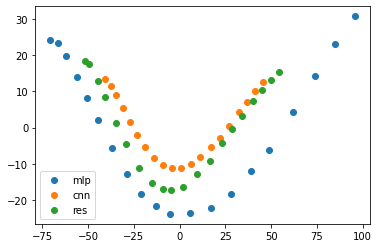

In [23]:
# Plotting models' parameters evolution during training
plt.scatter(w_mlp_reduced[:,0],w_mlp_reduced[:,1],label="mlp")
plt.scatter(w_cnn_reduced[:,0],w_cnn_reduced[:,1],label='cnn')
plt.scatter(w_res_reduced[:,0],w_res_reduced[:,1],label='res')
plt.legend()

In [34]:
torch.save(w_mlp,"param_hist_mlp")
torch.save(w_cnn,"param_hist_cnn")
torch.save(w_res,"param_hist_res")